In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2014-01-01 00:51:00,10.0,26.0,21.0,5.0,40.0,16.0,280.0,30.29,30.31,0.0
1,2014-01-01 01:51:00,10.0,26.0,21.0,5.0,40.0,9.0,290.0,30.32,30.34,0.0
2,2014-01-01 02:51:00,10.0,25.0,20.0,7.0,46.0,13.0,280.0,30.34,30.36,0.0
3,2014-01-01 03:51:00,10.0,25.0,20.0,7.0,46.0,11.0,280.0,30.35,30.37,0.0
4,2014-01-01 04:51:00,10.0,25.0,20.0,8.0,48.0,14.0,270.0,30.36,30.38,0.0


<hr>

Pre-Processing

In [4]:
import preprocess
preprocessor= preprocess.calculate()

In [5]:
data=preprocessor.remove_columns(data,['DATE','Precip','WETBULBTEMPF','DewPointTempF','StationPressure'])
data=preprocessor.replaceInvalidValueswithNull(data)
is_null_present=preprocessor.is_null_present(data)
if(is_null_present):
    data=preprocessor.impute_missing_values(data)

X,Y=preprocessor.separate_label_feature(data,label_column_name='VISIBILITY')

<hr>

Clustering approach

In [6]:
from sklearn.model_selection import train_test_split
import clustering
import tuner
import file_methods
import preprocess

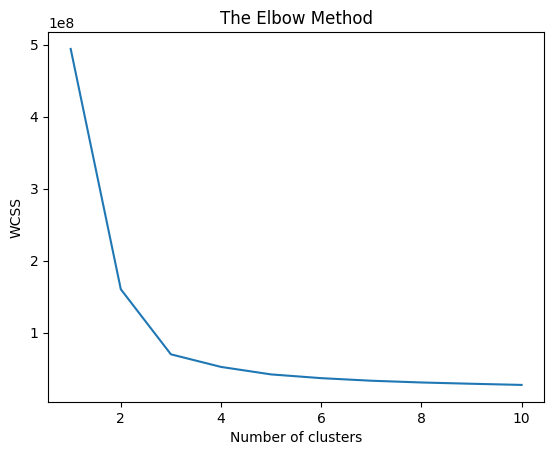

In [7]:
kmeans=clustering.KMeansClustering() # object initialization.
number_of_clusters=kmeans.elbow_plot(X)  #  using the elbow plot to find the number of optimum clusters

# Divide the data into clusters
X=kmeans.create_clusters(X,number_of_clusters)


#create a new column in the dataset consisting of the corresponding cluster assignments.
X['Labels']=Y
# getting the unique clusters from our dataset
list_of_clusters=X['Cluster'].unique()


<hr>

Finding suitable models for clusters

In [8]:
"""parsing all the clusters and looking for the best ML algorithm to fit on individual cluster"""

for i in list_of_clusters:
    cluster_data=X[X['Cluster']==i] # filter the data for one cluster
    # Prepare the feature and Label columns
    cluster_features=cluster_data.drop(['Labels','Cluster'],axis=1)
    cluster_label= cluster_data['Labels']
    
    # splitting the data into training and test set for each cluster one by one
    x_train, x_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=1 / 3, random_state=36)

    x_train_scaled = preprocessor.standardScalingData(x_train)
    x_test_scaled = preprocessor.standardScalingData(x_test)

    print(x_train.shape," ",y_train.shape)
    print(x_test.shape," ",y_test.shape)

    model_finder=tuner.Model_Finder() # object initialization

    #getting the best model for each of the clusters
    best_model_name,best_model=model_finder.get_best_model(x_train_scaled,y_train,x_test_scaled,y_test)

    # #saving the best model to the directory.
    file_op = file_methods.File_Operation()
    save_model=file_op.save_model(best_model,best_model_name+str(i))

(9318, 5)   (9318,)
(4659, 5)   (4659,)
Fitting 5 folds for each of 882 candidates, totalling 4410 fits
[CV 1/5] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] E

<hr>